In [1]:
!pip install linkpred

  Preparing metadata (setup.py) ... done
  Created wheel for smokesignal: filename=smokesignal-0.7.0-py3-none-any.whl size=6030 sha256=13aec4ca99e9bc9f5900aaeaa27a1a438aae01701cc3723b8ca187330cf1f2e1
  Stored in directory: /root/.cache/pip/wheels/dd/61/b2/4d7520f5b9b3e236bdef080edef4420f2203711b8f9279015f
Successfully built smokesignal


In [2]:
import linkpred

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
def read_net_w(filename):
  g = nx.Graph()
  with open(filename) as f:
    f.readline()
    for l in f:
      l = l.split(",")
      g.add_edge(l[0], l[1], weight=int(l[2]))
  return g

In [5]:
g = read_net_w(f'got-s6-edges.csv')

In [6]:
cn = linkpred.predictors.CommonNeighbours(g, excluded=g.edges()) # We aim to predict onl
cn_results = cn.predict()

top = cn_results.top(5)
for edge, score in top.items():
  print(edge, score)


TOMMEN - MACE 8.0
NED - LADY_CRANE 8.0
NED - CLARENZO 8.0
MARGAERY - IZEMBARO 8.0
MARGAERY - ARYA 8.0


In [7]:
jc = linkpred.predictors.Jaccard(g, excluded=g.edges())
jc_results = jc.predict()

top = jc_results.top(5)
for edge, score in top.items():
  print(edge, score)

RED_PRIEST - KINVARA 1.0
LITTLE_SAM - DICKON 1.0
TOMMEN - MACE 0.7272727272727273
JOFFREY - CAMELLO 0.7272727272727273
OLD_NAN - BENJEN 0.7142857142857143


In [8]:
aa = linkpred.predictors.AdamicAdar(g, excluded=g.edges())
aa_results = aa.predict()

top = aa_results.top(5)
for edge, score in top.items():
  print(edge, score)

TOMMEN - MACE 3.1875572810307893
NED - LADY_CRANE 3.126371165725783
NED - CLARENZO 3.126371165725783
SANSA - ROBB 3.096644315133246
JOFFREY - CAMELLO 2.8944937119329137


In [9]:
kz = linkpred.predictors.Katz(g, excluded=g.edges())
kz_results = kz.predict()

top = kz_results.top(5)
for edge, score in top.items():
  print(edge, score)


LADY_CRANE - JAQEN 0.005571576860773001
SANSA - ALLISER_THORNE 0.004234378077202
TYRION - DAARIO 0.004145905054793999
CERSEI - BRIENNE 0.0038862606857720003
MELISANDRE - LYANNA_MORMONT 0.0035937193855959996


In [10]:
gd = linkpred.predictors.GraphDistance(g, excluded=g.edges())
gd_results = gd.predict()

top = gd_results.top(5)
for edge, score in top.items():
  print(edge, score)

LADY_CRANE - JAQEN 36.136054421768705
TYRION - DAARIO 30.29268292682927
CERSEI - BRIENNE 28.44827586206896
MELISANDRE - LITTLEFINGER 23.427491305005294
CERSEI - BRONN 23.294117647058822


In [11]:
simrank = linkpred.predictors.SimRank(g, excluded=g.edges())
simrank_results = simrank.predict(c=0.5)

top = simrank_results.top(5)
for edge, score in top.items():
  print(edge, score)

MAESTER_CITADEL - MAESTER_AEMON 0.3920701611834253
RAY - GATINS 0.3886464843365491
GATINS - BERIC 0.3675791855431439
THOROS - GATINS 0.3636591552182033
MAESTER_AEMON - GILLY 0.319889623157789


In [12]:
rnd = linkpred.predictors.Random(g, excluded=g.edges())
rnd_results = rnd.predict()

top = simrank_results.top(5)
for edge, score in top.items():
  print(edge, score)

MAESTER_CITADEL - MAESTER_AEMON 0.3920701611834253
RAY - GATINS 0.3886464843365491
GATINS - BERIC 0.3675791855431439
THOROS - GATINS 0.3636591552182033
MAESTER_AEMON - GILLY 0.319889623157789


In [13]:
import random
import itertools
from linkpred.evaluation import Pair

# Building the test network
test = read_net_w(f'got-s7-edges.csv')

# Exclude test network from learning phase
training = g.copy()

# Node set
nodes = list(g.nodes())
nodes.extend(list(test.nodes()))

test = [Pair(i) for i in test.edges()]
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])

In [14]:
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())
cn_results = cn.predict()

aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())
aa_results = aa.predict()

jc = linkpred.predictors.Jaccard(training, excluded=training.edges())
jc_results = jc.predict()

In [15]:
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)
aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)

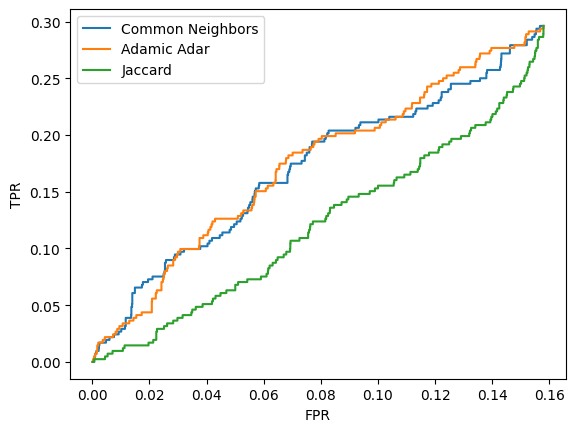

In [16]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import auc

print("Area Under Roc Curve (AUROC)")
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")
print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")
print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")

Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.026832485313825823
Adamic Adar: 	 0.02725982481278175
Jaccard: 	 0.018894838921578106


Даалгавар:
1. Jaccard болон Adamic Adar хоёр яагаад ялгаатай үр дүн үзүүлж байна вэ? Тайлбарлана уу.
2. linkpred санг ашиглан desicion tree алгоритмаар холбоосыг илрүүлж болох уу.

1. Эдгээр хоёр арга нь node хоорондын төстэй байдал (similarity)-г өөр өөрөөр хэмждэг:

Jaccard Similarity:

Томьёо:
J
a
c
c
a
r
d
(
u
,
v
)
=
∣
Γ
(
u
)
∩
Γ
(
v
)
∣
∣
Γ
(
u
)
∪
Γ
(
v
)
∣
Jaccard(u,v)=
∣Γ(u)∪Γ(v)∣
∣Γ(u)∩Γ(v)∣
​

(энд
Γ
(
u
)
Γ(u)
 гэдэг нь node u-ийн хөршүүдийн олонлог)
Зөвхөн нийтлэг хөршийн тоо (common neighbors) болон нийт хөршүүдийн нийлбэр дээр үндэслэнэ.
Бүх хөршүүдийг тэгш жинтэй гэж үздэг (equal weight).
Хэрэв хоёр node олон нийтлэг хөрштэй байвал өндөр утга авна.

Adamic-Adar Index:

Томьёо:
A
A
(
u
,
v
)
=
∑
w
∈
Γ
(
u
)
∩
Γ
(
v
)
1
log
⁡
∣
Γ
(
w
)
∣
AA(u,v)=
w∈Γ(u)∩Γ(v)
∑
​
  
log∣Γ(w)∣
1
​

Нийтлэг хөрш бүрийн харьцангуй ховор байдал (rarity)-д үндэслэнэ.
Хэрвээ нийтлэг хөрш w нь маш олон холбоос (high degree)-той бол түүний жин багасна.
Ховор хөрштэй байх нь илүү чухал гэж үздэг.

Ялгааны шалтгаан:

Jaccard нь ерөнхий дундаж төстэй байдлыг харуулдаг бол,
Adamic-Adar нь онцгой, ховор хөршүүдийг илүү өндөр үнэлдэг.
Иймээс тухайн графын бүтэц (жишээ нь, degree distribution) дээрээс хамаарч хоёр арга өөр өөр үр дүн гаргана.


2.  linkpred сангийн талаар:

1. Энэ сан нь unsupervised болон supervised аргуудаар node хоорондын холбоосыг урьдчилан таамаглахад ашиглагддаг.

2. linkpred-ийн supervised mode нь SVM, logistic regression гэх мэт зарим ML загваруудыг ашиглаж чаддаг.

Decision Tree ашиглаж болох уу?:

1. Тийм, гэхдээ linkpred сан дотроо Decision Tree-ийг шууд дэмждэггүй.

1. Гэсэн ч дараах байдлаар ашиглаж болно:

   1. linkpred-ийг ашиглан node хооронд feature-үүд (жишээ нь: Jaccard, Adamic-Adar гэх мэт) үүсгэнэ.

  2. Эдгээр feature-үүдийг .to_dataframe() зэрэг функцээр гаргаж авна.

  3. Гарсан датагаа scikit-learn-ийн DecisionTreeClassifier руу оруулан supervised learning хийнэ.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = df[["jaccard", "adamic_adar"]]  # Feature-үүд
y = df["label"]                     # True/False буюу холбоостой эсэх

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print("Accuracy:", clf.score(X_test, y_test))


Дүгнэлт:

linkpred-ийг feature generator байдлаар ашиглаж болно.
Decision Tree загварыг гадаад талаас (scikit-learn) ашиглан supervised link prediction хийж болно.